### Necessary Libraries

In [35]:
%pip install numpy pandas matplotlib seaborn scipy selenium webdriver_manager scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.cluster import KMeans

# Web Scraping and Introductory Data Analysis

Welcome to Homework 0, where we will delve into web scraping and perform an introductory data analysis. This homework will be a hands-on exercise that will help you become familiar with the process of extracting data from websites and conducting basic statistical analysis. 

## Objectives

By the end of this homework, you will be able to:

1. Set up a Python environment with the necessary libraries for web scraping and data analysis.
2. Write a web scraping script using Beautiful Soup and Selenium to collect data from a website.
3. Sample from the collected dataset and compare the statistics of the sample and the population.
   
## Tasks

1. **Environment Setup**: Install the required libraries such as Beautiful Soup, Selenium, pandas, numpy, matplotlib, and seaborn.

2. **Web Scraping**: Write a script to scrape transaction data from [Etherscan.io](https://etherscan.io/txs). Use Selenium to interact with the website and Beautiful Soup to parse the HTML content.

3. **Data Sampling**: Once the data is collected, create a sample from the dataset. Compare the sample statistics (mean and standard deviation) with the population statistics.


## Deliverables

1. A Jupyter notebook with all the code and explanations.
2. A detailed report on the findings, including the comparison of sample and population statistics.
Note: You can include the report in your notebook.

## Getting Started

Begin by setting up your Python environment and installing the necessary libraries. Then, proceed with the web scraping task, ensuring that you handle any potential issues such as rate limiting. Once you have the data, move on to the data sampling and statistical analysis tasks. 

Remember to document your process and findings in the Jupyter notebook, and to include visualizations where appropriate to illustrate your results. <br>
Good luck, and happy scraping!

## Data Collection (Etherscan)

In this section, we will use web scraping to gather transaction data from the Ethereum blockchain using the Etherscan block explorer. Our objective is to collect transactions from the **last 10 blocks** on Ethereum.

To accomplish this task, we will employ web scraping techniques to extract the transaction data from the Etherscan website. The URL we will be targeting for our data collection is:

[https://etherscan.io/txs](https://etherscan.io/txs)

### Steps

1. **Navigate to the URL**: Use Selenium to open the Etherscan transactions page in a browser.

2. **Locate the Transaction Data**: Identify the HTML elements that contain the transaction data for the specified block range.

3. **Extract the Data**: Write a script to extract the transaction details e.g. Hash, Method, Block, etc.

4. **Handle Pagination**: If the transactions span multiple pages, implement pagination handling to navigate through the pages and collect all relevant transaction data.

5. **Store the Data**: Save the extracted transaction data into a structured format, such as a CSV file or a pandas DataFrame, for further analysis.

### Considerations

- **Rate Limiting**: Be mindful of the website's rate limits to avoid being blocked. Implement delays between requests if necessary.
- **Dynamic Content**: The Etherscan website may load content dynamically. Ensure that Selenium waits for the necessary elements to load before attempting to scrape the data.
- **Data Cleaning**: After extraction, clean the data to remove any inconsistencies or errors that may have occurred during the scraping process.

### Resources

- [Beautiful Soup Documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
- [Selenium Documentation](https://selenium-python.readthedocs.io/)
- [Pandas Documentation](https://pandas.pydata.org/docs/)
- [Ethereum](https://ethereum.org/en/)

In [3]:
import os
import subprocess

def run_script(script, output_file=None):
    if output_file is None or not os.path.exists(output_file):
        print(f"- running {script} to create {output_file}")
        process = subprocess.Popen(["python", script], 
                                stdout=subprocess.PIPE, 
                                stderr=subprocess.PIPE,
                                text=True)
        while True:
            output = process.stdout.readline()
            if output == '' and process.poll() is not None:
                break
            if output:
                print(output.strip())
                
        if process.poll() is None:
            process.terminate()

In [4]:
run_script("scrape.py", "data.csv")
run_script("cleanse.py")

- running cleanse.py to create None
1. deleting these columns: ['Unnamed: 1', 'Txn Hash', 'Age', 'From', 'Unnamed: 7', 'To']
2. filtering data by whether their Value ends with 'ETH'
3. turning Txn Fee column into float
4. turning Value column into float
5. dropping duplicates
6. dropping nan cells
saving data in 'cleansed_data.csv'


## Data Analysis

Now that we have collected the transaction data from Etherscan, the next step is to perform conduct an initial analysis. This task will involve the following steps:

1. **Load the Data**: Import the collected transaction data into a pandas DataFrame.

2. **Data Cleaning**: Clean the data by converting data types, removing any irrelevant information, and handling **duplicate** values.

3. **Statistical Analysis**: Calculate the mean and standard deviation of the population. Evaluate these statistics to understand the distribution of transaction values. The analysis and plotting will be on **Txn Fee** and **Value**.

4. **Visualization**: This phase involves the creation of visual representations to aid in the analysis of transaction values. The visualizations include:
    - A histogram for each data column, which provides a visual representation of the data distribution. The selection of bin size is crucial and should be based on the data's characteristics to ensure accurate representation. Provide an explanation on the bin size selection!
    - A normal distribution plot fitted alongside the histogram to compare the empirical distribution of the data with the theoretical normal distribution.
    - A box plot and a violin plot to identify outliers and provide a comprehensive view of the data's distribution.

### Deliverables

The project aims to deliver the following deliverables:

- A refined pandas DataFrame containing the transaction data, which has undergone thorough cleaning and is ready for analysis.
- A simple statistical analysis evaluating the population statistics, offering insights into the distribution of transaction values and fees.
- A set of visualizations showcasing the distribution of transaction values for the population. These visualizations include histograms, normal distribution plots, box plots, and violin plots, each serving a specific purpose in the analysis.

### Getting Started

The project starts with the importing of transaction data into a pandas DataFrame, setting the stage for data manipulation and analysis. Subsequent steps involve the cleaning of the data to ensure its quality and reliability. Followed by the calculation of population statistics. Finally, a series of visualizations are created to visually analyze the distribution of transaction values and fees.

In [5]:
df = pd.read_csv('cleansed_data.csv', index_col=0)

In [6]:
df.head()

,Method,Block,Value,Txn Fee
0,Transfer,19361125,0.077182,0.001803
1,Transfer,19361125,0.000000,0.005154
2,Take Ask Single,19361125,1.069000,0.012841
3,Execute,19361125,0.000000,0.028428
4,Approve,19361125,0.000000,0.003823


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1495 entries, 0 to 1590
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Method   1495 non-null   object 
 1   Block    1495 non-null   int64  
 2   Value    1495 non-null   float64
 3   Txn Fee  1495 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 58.4+ KB


In [8]:
txn_fee_mean = df['Txn Fee'].mean()
txn_fee_std = df['Txn Fee'].std()

value_mean = df['Value'].mean()
value_std = df['Value'].std()

print(f"Txn Fee Mean: {txn_fee_mean}, Standard Deviation: {txn_fee_std}")
print(f"Value Mean: {value_mean}, Standard Deviation: {value_std}")

Txn Fee Mean: 0.00895930714381271, Standard Deviation: 0.01715231195204883
Value Mean: 0.9508479466595318, Standard Deviation: 14.398253312581035


#### Adding Logarithm Columns

In [9]:
internal_tx_df = df[df['Value'] == 0]
external_tx_df = df[df['Value'] != 0]

In [11]:
internal_tx_df.loc[:, 'Log Txn Fee'] = np.log(internal_tx_df['Txn Fee'])

In [13]:
external_tx_df.loc[:, 'Log Txn Fee'] = np.log(external_tx_df['Txn Fee'])
external_tx_df.loc[:, 'Log Value'] = np.log(external_tx_df['Value'])

#### Information About Dataframes

In [14]:
internal_tx_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 809 entries, 1 to 1590
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Method       809 non-null    object 
 1   Block        809 non-null    int64  
 2   Value        809 non-null    float64
 3   Txn Fee      809 non-null    float64
 4   Log Txn Fee  809 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 37.9+ KB


In [15]:
external_tx_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 686 entries, 0 to 1587
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Method       686 non-null    object 
 1   Block        686 non-null    int64  
 2   Value        686 non-null    float64
 3   Txn Fee      686 non-null    float64
 4   Log Txn Fee  686 non-null    float64
 5   Log Value    686 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 37.5+ KB


#### Plotting Histograms and the Fitted Normal Distribution

In [25]:
def plot_histogram_and_normal_dist(df, column, bin_size='auto', title=''):
    sns.histplot(df[column], bins=bin_size, kde=False, stat='density', label='Histogram')
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, df[column].mean(), df[column].std())
    plt.plot(x, p, 'k', linewidth=2, label='Normal dist')
    title = title or f'Distribution of {column}'
    plt.title(title)
    plt.legend()

##### Internal Transfers

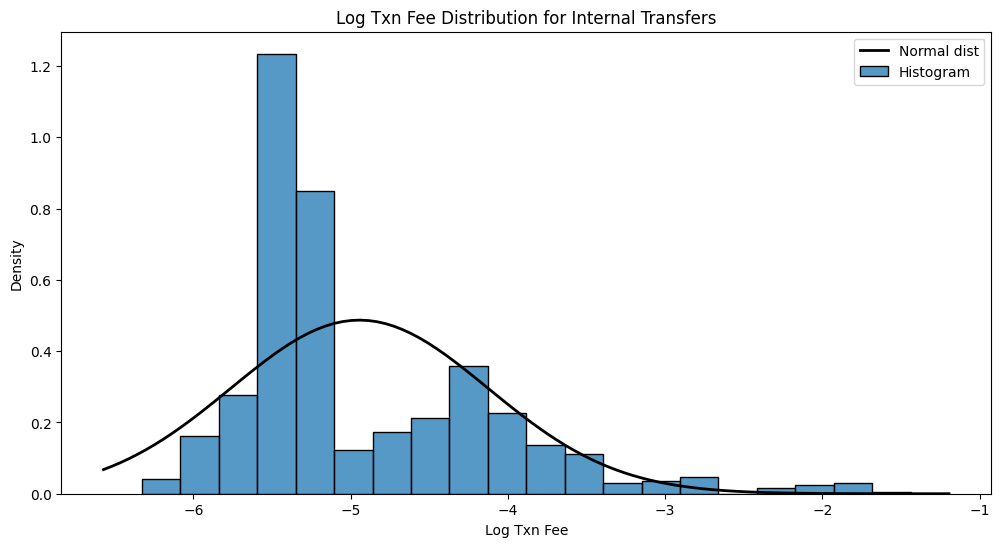

In [34]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
plot_histogram_and_normal_dist(internal_tx_df, 'Log Txn Fee', title='Log Txn Fee Distribution for Internal Transfers')
plt.show()

##### External Transfers

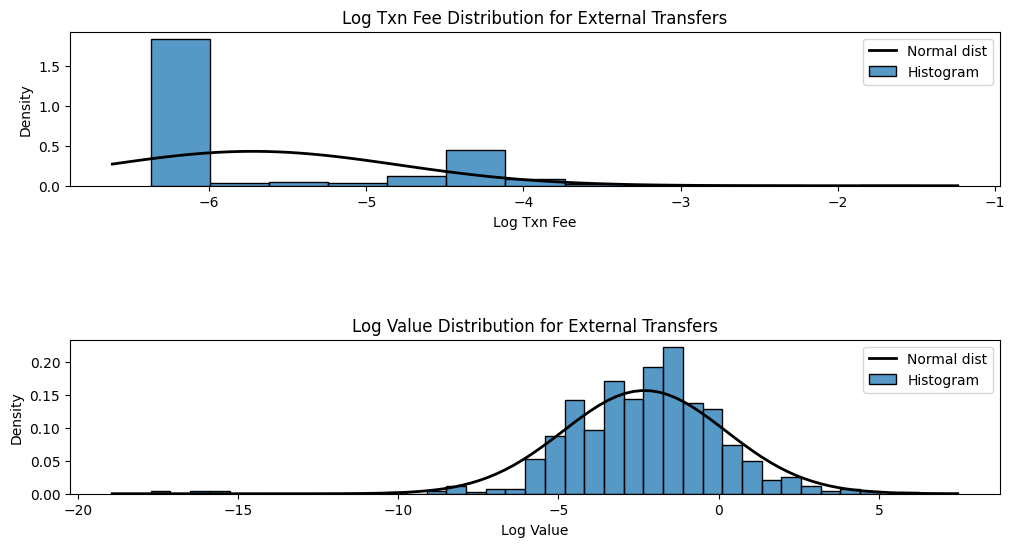

In [33]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plot_histogram_and_normal_dist(external_tx_df, 'Log Txn Fee', title='Log Txn Fee Distribution for External Transfers')

plt.subplot(2, 1, 2)
plot_histogram_and_normal_dist(external_tx_df, 'Log Value', title='Log Value Distribution for External Transfers')

plt.subplots_adjust(hspace=1)
plt.show()

##### Violin and Box Plots 

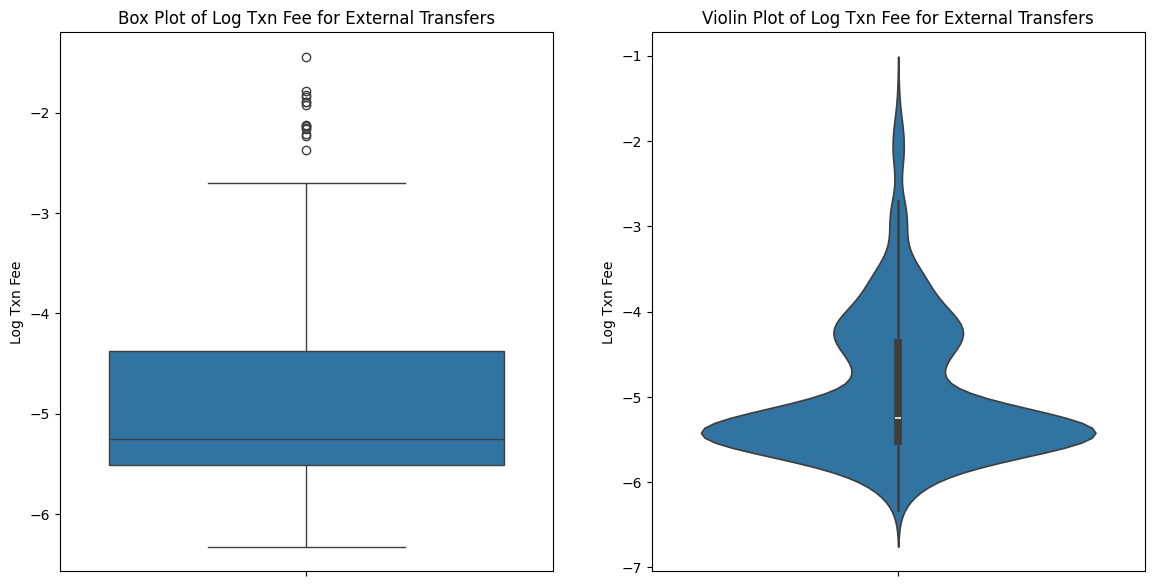

In [30]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.boxplot(data=internal_tx_df, y='Log Txn Fee')
plt.title('Box Plot of Log Txn Fee for External Transfers')

plt.subplot(1, 2, 2)
sns.violinplot(data=internal_tx_df, y='Log Txn Fee')
plt.title('Violin Plot of Log Txn Fee for External Transfers')

plt.show()

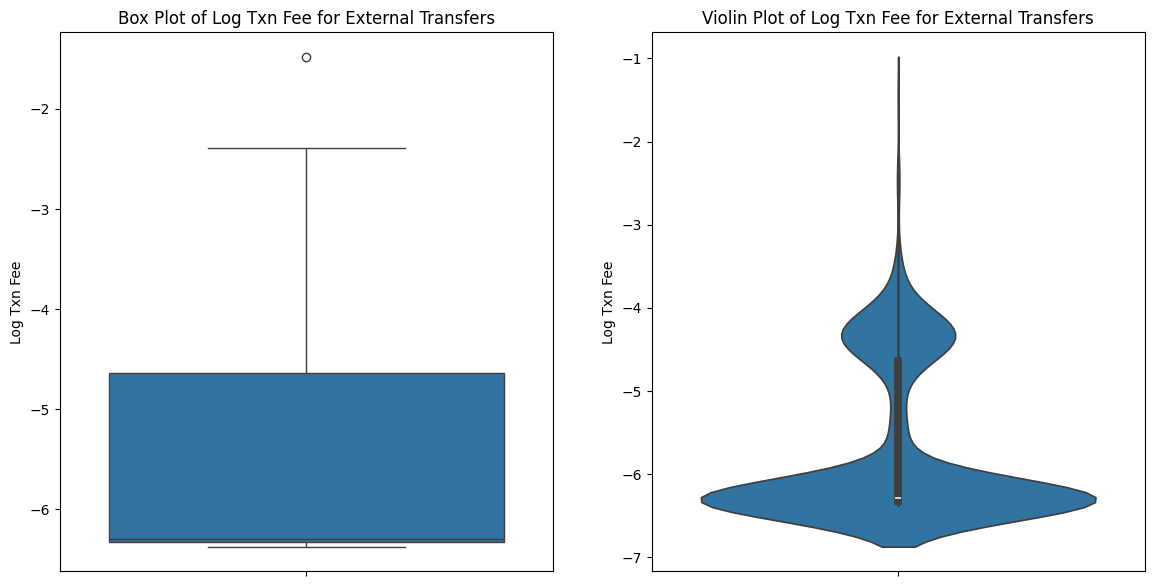

In [31]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.boxplot(data=external_tx_df, y='Log Txn Fee')
plt.title('Box Plot of Log Txn Fee for External Transfers')

plt.subplot(1, 2, 2)
sns.violinplot(data=external_tx_df, y='Log Txn Fee')
plt.title('Violin Plot of Log Txn Fee for External Transfers')

plt.show()

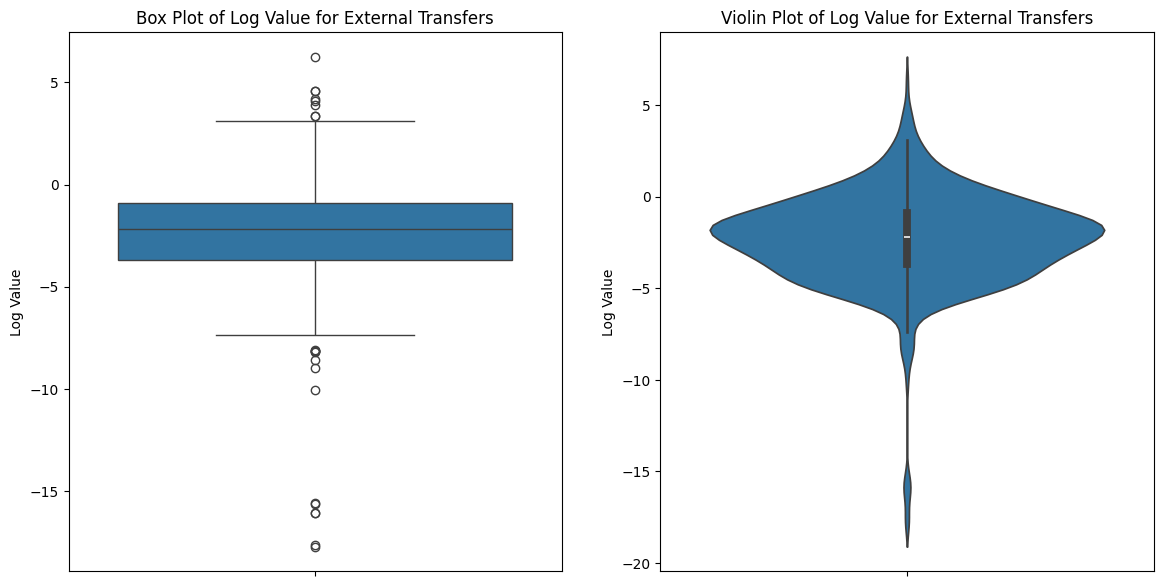

In [32]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.boxplot(data=external_tx_df, y='Log Value')
plt.title('Box Plot of Log Value for External Transfers')

plt.subplot(1, 2, 2)
sns.violinplot(data=external_tx_df, y='Log Value')
plt.title('Violin Plot of Log Value for External Transfers')

plt.show()

##### Clustering Transaction Fees Using K-Means

## Data Sampling and Analysis

In this section, we will delve into the process of data sampling and perform an initial analysis on the transaction data we have collected. Our objective is to understand the distribution of transaction values by sampling the data and comparing the sample statistics with the population statistics.

### Steps

1. **Load the Data**: Import the collected transaction data into a pandas DataFrame.

2. **Data Cleaning**: Clean the data by handling missing values, converting data types, and removing any irrelevant information.

3. **Simple Random Sampling (SRS)**: Create a sample from the dataset using a simple random sampling method. This involves randomly selecting a subset of the data without regard to any specific characteristics of the data.

4. **Stratified Sampling**: Create another sample from the dataset using a stratified sampling method. This involves dividing the data into strata based on a specific characteristic (e.g., transaction value) and then randomly selecting samples from each stratum. Explain what you have stratified the data by and why you chose this column.

5. **Statistical Analysis**: Calculate the mean and standard deviation of the samples and the population. Compare these statistics to understand the distribution of transaction values.

6. **Visualization**: Plot the distribution of transaction values and fees for both the samples and the population to visually compare their distributions.

### Considerations

- **Sample Size**: The size of the sample should be large enough to represent the population accurately but not so large that it becomes impractical to analyze.
- **Sampling Method**: Choose the appropriate sampling method based on the characteristics of the data and the research question.

Explain the above considerations in your report.

In [ ]:
df.head()

In [ ]:
# Simple Random Sampling:
sample_size = 800

if df.empty:
    print("The DataFrame is empty.")
else:
    print(f"The DataFrame has {len(df)} rows.")
if len(df) < sample_size:
    print(f"Cannot sample {sample_size} rows from a DataFrame with only {len(df)} rows.")
else:
    SRS_samples = df.sample(n=sample_size)
    print("Sampled successfully.")


In [ ]:
SRS_samples

In [ ]:
# Stratified Sampling:
stratified_sample_size = 10

stratified_samples = df.groupby(['Txn Fee'], group_keys=False).apply(lambda x: x.sample(min(len(x), stratified_sample_size)))



In [ ]:
stratified_samples

In [ ]:
# Statistical Analysis:

# ***Simple Random Sampling***
SRS_txn_fee_mean = SRS_samples['Txn Fee'].mean()
SRS_txn_fee_std = SRS_samples['Txn Fee'].std()

SRS_value_mean = SRS_samples['Value'].mean()
SRS_value_std = SRS_samples['Value'].std()

print("Simple Random Sampling:")
print(f"Txn Fee Mean: {SRS_txn_fee_mean}, Standard Deviation: {SRS_txn_fee_std}")
print(f"Value Mean: {SRS_value_mean}, Standard Deviation: {SRS_value_std}")

# ***Stratified Sampling***
stratified_txn_fee_mean = stratified_samples['Txn Fee'].mean()
stratified_txn_fee_std = stratified_samples['Txn Fee'].std()

stratified_value_mean = stratified_samples['Value'].mean()
stratified_value_std = stratified_samples['Value'].std()

print("Stratified Random Sampling:")
print(f"stratified: Txn Fee Mean: {stratified_txn_fee_mean}, Standard Deviation: {stratified_txn_fee_std}")
print(f"stratified: Value Mean: {stratified_value_mean}, Standard Deviation: {stratified_value_std}")

# ***Without Sampling***
print("Without Sampling:")
print(f"Txn Fee Mean: {txn_fee_mean}, Standard Deviation: {txn_fee_std}")
print(f"Value Mean: {value_mean}, Standard Deviation: {value_std}")


In [ ]:
# Visualization:
#***Simple Random Sampling***
def plot_histogram_and_normal_dist(column, bin_size='auto', title=''):
    sns.histplot(SRS_samples[column], bins=bin_size, kde=False, stat='density', label='Histogram')
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x,  SRS_samples[column].mean(),  SRS_samples[column].std())
    plt.plot(x, p, 'k', linewidth=2, label='Normal dist')
    title = title or f'Distribution of {column}'
    plt.title(title)
    plt.legend()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_histogram_and_normal_dist('Txn Fee', title='Txn Fee Distribution')

plt.subplot(1, 2, 2)
plot_histogram_and_normal_dist('Value', title='Value Distribution')

plt.show()

In [ ]:
#***Simple Random Sampling***
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.boxplot(data=SRS_samples, y='Txn Fee')
plt.title('Box Plot of Txn Fee')

plt.subplot(1, 2, 2)
sns.violinplot(data=SRS_samples, y='Value')
plt.title('Violin Plot of Value')

plt.show()


In [ ]:
#***Stratified Random Sampling***
def plot_histogram_and_normal_dist(column, bin_size='auto', title=''):
    sns.histplot(stratified_samples[column], bins=bin_size, kde=False, stat='density', label='Histogram')
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x,  stratified_samples[column].mean(),  stratified_samples[column].std())
    plt.plot(x, p, 'k', linewidth=2, label='Normal dist')
    title = title or f'Distribution of {column}'
    plt.title(title)
    plt.legend()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_histogram_and_normal_dist('Txn Fee', title='Txn Fee Distribution')

plt.subplot(1, 2, 2)
plot_histogram_and_normal_dist('Value', title='Value Distribution')

plt.show()

In [ ]:
#***Stratified Random Sampling***
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.boxplot(data=stratified_samples, y='Txn Fee')
plt.title('Box Plot of Txn Fee')

plt.subplot(1, 2, 2)
sns.violinplot(data=stratified_samples, y='Value')
plt.title('Violin Plot of Value')

plt.show()